# Warenkorbanalyse einer Bäckerei

## Inhaltsverzeichnis

- [**Datenbestand**](#Datenbestand)
    - [Eigenschaften](#Eigenschaften)
    - [Idee](#Idee)
- [**Theorie**](#Theorie)
- [**Untersuchen der Daten**](#Untersuchen-der-Daten)
- [**Vorbereiten der Daten**](#Vorbereiten-der-Daten)
    - [Prüfen der Null Werte](#Pruefen-der-Null-Werte)
    - [Formatieren der Daten](#Formatieren-der-Daten)
    - [Visualisierung der Daten](#Visualisierung-der-Daten)
- [**Warenkorbanalyse**](#Warenkorbanalyse)
- [**Fazit**](#Fazit)
- [**Excel Bonus**](#Excel-Bonus)


<a id='Features'></a>

<a id="Datenbestand"></a>
## Datenbestand

Das Daten-Set liegt unter https://www.kaggle.com/sulmansarwar/transactions-from-a-bakery) und beschreibt die Tansaktionen einer Bäckerei namens "The Bread Basket" in der Altstadt von Edinburgh, Scotland. Diese Bäckerei bietet ein erfrischendes Angebot an argentinischen und spanischen Produkten.

<a id='Features'></a>

<a id="Eigenschaften"></a>
### Eigenschaften
Im Daten-Set gibt es über 9.000 Transaktionen aus der Bäckerei und es hat folgende Felder:
 
 
 
 
 
 
    - Date:
        Kategoriale Variable beschreibt das Datum der Transaktionen im Format JJJJ-MM-TT. Die Spalte enthält Daten vom 30.10.2016 bis zum 09.04.2017.
    - Time:
        Kategoriale Variable beschreibt die Zeit der Transaktionen im Format HH:MM:SS.
    - Transactions:
        Quantitative Variable, mit der die Transaktionen unterscheiden können. Die Zeilen, die in diesem Feld den gleichen Wert haben, gehören zu derselben Transaktion.
    - Item:
        Kategoriale Variable mit den Produkten.

<a id='ThePlan'></a>

<a id="Idee"></a>
### Idee

Jedes, wirklich jedes, Unternehmen, das etwas verkauft, besitzt automatisch die Daten, egal ob im elektronischen Format oder auf dem Papier, für eine Warenkorbanalyse. Und die Bäckereien sind in diesem Sinne keine Ausnahme. Das Daten-Set der Bäckerei aus Edinburgh wird genau für die Warenkorbanalyse-Modellierungstechnik (engl.  Market Basket Analysis) verwendet. Die Idee dieser Technik ist ein Einkaufsmuster innerhalb von Artikeln vorhersagen zu können, was sie im Handel populär macht.

Anders gesagt, basierend am Daten-Set der Bäckerei werden wir versuchen, die Verbindung zwischen gekauften Artikeln zu finden. Zum Beispiel, wenn jemand 'Produkt_1' kauft, wie wahrscheinlich dann ist, dass auch 'Produkt_2' gekauft wird? Mehr dazu ist in der [Wikipedia](https://de.wikipedia.org/wiki/Apriori-Algorithmus) zu finden.

--------------------------------------------------------------------------------------------------

<a id="Theorie"></a>
## Theorie

Die Warenkorbanalyse besteht aus einer Reihe von Assoziationsverfahren (die Suche nach starken Regeln). Eins davon ist der [**Apriori-Algorithmus**](https://de.wikipedia.org/wiki/Apriori-Algorithmus) und seine zentralen Kennzahlen sind: Support, Konfidenz und Lift.

### - Support

    Der Support beantwortet die Frage, wie oft ein Produkt prozentual überhaupt gekauft wird:     
    
    Support(Produkt_1)(%) = [ (Transaktonen mit dem Produkt_1) / (Gesamte Anzahl der Transaktonen) ] * 100%
    
    Support(Produkt_1 und Produkt_2) = [(Transakt. mit Produkt_1 und Produkt_2) / (Gesamte Anzahl der Transakt.)] * 100%

### - Konfidenz

    Die Konfidenz(Produkt_1 -> Produkt_2) sagt, wie oft das Produkt_2 gekauft wird, wenn das Produkt_1 gekauft wird.
    
    Konfidenz(Produkt_1 -> Produkt_2)(%) = (Transakt. mit Produkt_1 und Produkt_2) / (Transakt. mit dem Produkt_1) * 100%
    oder
    Konfidenz(Produkt_1 -> Produkt_2)(%) = Support(Produkt_1 und Produkt_2) / Support(Produkt_1)
    
### - Lift

    Der Lift gibt die Antwort auf die Frage, um wie viel wahrscheinlicher mach das Produkt_1 den Kauf des Produkts_2
    
    Lift(Produkt_1 -> Produkt_2)(%) = Konfidenz(Produkt_1 -> Produkt_2) / Support(Produkt_2)
    oder
    Lift(Produkt_1 -> Produkt_2)(%) = Support(Produkt_1 und Produkt_2) / ( Support(Produkt_1) * Support(Produkt_2) )
    
    Ein Lift von 1 oder 100% bedeutet, dass es keine Verbindung zwischen dem Produkt_1 und dem Produkt_2 besteht. Ein Lift von mehr als 1 (mehr als 100%) bedeutet, dass Produkt_1 und Produkt_2 häufiger zusammen gekauft werden. Ein Lift von weniger als 1 (weniger als 100%) zeigt, dass es unwahrscheinlich ist, dass zwei Produkte zusammen gekauft werden.

***

<a id="Untersuchen-der-Daten"></a>
## Untersuchen der Daten

Zuerst werden die Python's Bibliotheken importiert, die wir für die Analyse der Daten verwenden werden.

In [37]:
# Import der Data Science Pakete (pandas etc.)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Warnings ignorieren
import warnings
warnings.filterwarnings('ignore')

# Style festlegen
sns.set(style='darkgrid')
plt.rcParams["patch.force_edgecolor"] = True

# Verzeichnis auflisten das Daten-Set 'BreadBasket_DMS.csv' sollte im Verzeicnis liegen 
import os
print(os.listdir("./"))

['.ipynb_checkpoints', 'baeckerei_warenkorbanalyse.ipynb', 'BreadBasket_DMS.csv']


Lesen wir das Datenbestandes aus der 'BreadBasket_DMS.csv'-Datei ins pandas's DataFrame-Objekt und auflisten die Daten mit den Eigenschaften.

In [5]:
# Lesen der 'BreadBasket_DMS.csv'-Datei ins pandas's DataFrame-Objekt 
df = pd.read_csv('./BreadBasket_DMS.csv')

In [6]:
print('Data-Set Information: \n')
print(df.info())

Data-Set Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB
None


In [10]:
print('Die ersten zehn Zeilen aus dem Datenbestand: \n')
print(df.head(10))

Die ersten zehn Zeilen aus dem Datenbestand: 

         Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam
5  2016-10-30  10:07:57            3        Cookies
6  2016-10-30  10:08:41            4         Muffin
7  2016-10-30  10:13:03            5         Coffee
8  2016-10-30  10:13:03            5         Pastry
9  2016-10-30  10:13:03            5          Bread


Da die Bäckerei aus Großbritannien ist und ein Angebot an argentinischen und spanischen Produkten hat, ist das ein wenig schwierig, die Benennung der Produkten auf eine "durchschnittliche" Bäckerei aus Deutschland zu portieren. Deshalb lassen wir die Produkte so benennen, wie sie im Daten-Set vorkommen.

In [11]:
print('Eindeutige verkaufte Produkte: ', df['Item'].nunique())
print( '\n', df['Item'].unique())

Eindeutige verkaufte Produkte:  95

 ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Bru

<a id="Vorbereiten-der-Daten"></a>
## Vorbereiten der Daten

<a id="Pruefen-der-Null-Werte"></a>
### Prüfen der Null Werte

Als erstes prüfen wir das Daten-Set auf die Null Werte und dann auf die Werte, die mit "NONE" (undefinierte Daten) gekennzeichnet sind.

In [12]:
# Gibt es die Null Werte und wenn ja, wie viele?
print(df.isnull().sum().sort_values(ascending=False))

Item           0
Transaction    0
Time           0
Date           0
dtype: int64


Erstaunlich. Es sieht so aus, als ob es keine fehlenden Daten gebe. Und was ist mit den "NONE" Werten.

In [13]:
# Auflisten der "NONE" Werte
print(df[df['Item']=='NONE'])

             Date      Time  Transaction  Item
26     2016-10-30  10:27:21           11  NONE
38     2016-10-30  10:34:36           15  NONE
39     2016-10-30  10:34:36           15  NONE
66     2016-10-30  11:05:30           29  NONE
80     2016-10-30  11:37:10           37  NONE
85     2016-10-30  11:55:51           40  NONE
126    2016-10-30  13:02:04           59  NONE
140    2016-10-30  13:37:25           65  NONE
149    2016-10-30  13:46:48           67  NONE
167    2016-10-30  14:32:26           75  NONE
183    2016-10-31  08:47:05           82  NONE
201    2016-10-31  09:22:48           91  NONE
226    2016-10-31  10:07:40          103  NONE
235    2016-10-31  10:21:29          105  NONE
272    2016-10-31  11:42:05          123  NONE
282    2016-10-31  11:55:00          128  NONE
398    2016-11-01  09:26:03          184  NONE
413    2016-11-01  10:56:08          192  NONE
419    2016-11-01  11:06:09          195  NONE
431    2016-11-01  11:22:36          201  NONE
547    2016-1

Von den "NONE" Werte gibt es ein Haufen. Das passiert, wenn etwas verkauft wird und noch keine Bezeichnung im Bestand hat. Der einfachte Weg ist diese Daten nicht verwenden. So werden sie im Daten-Set gelöscht.

In [14]:
df.drop(df[df['Item']=='NONE'].index, inplace=True)

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
Date           20507 non-null object
Time           20507 non-null object
Transaction    20507 non-null int64
Item           20507 non-null object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB
None


<a id="Formatieren-der-Daten"></a>
### Formatieren der Daten

Das Datum und die Zeit sind nicht die numerischen Werte im Datenbestand. Zur besseren Visualisierung und Analyse der Daten wandeln wir sie in die numerischen Werte um.

In [16]:
# Year
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])
# Month
df['Month'] = df['Date'].apply(lambda x: x.split("-")[1])
# Day
df['Day'] = df['Date'].apply(lambda x: x.split("-")[2])

In [17]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 7 columns):
Date           20507 non-null object
Time           20507 non-null object
Transaction    20507 non-null int64
Item           20507 non-null object
Year           20507 non-null object
Month          20507 non-null object
Day            20507 non-null object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB
None
         Date      Time  Transaction           Item  Year Month Day
0  2016-10-30  09:58:11            1          Bread  2016    10  30
1  2016-10-30  10:05:34            2   Scandinavian  2016    10  30
2  2016-10-30  10:05:34            2   Scandinavian  2016    10  30
3  2016-10-30  10:07:57            3  Hot chocolate  2016    10  30
4  2016-10-30  10:07:57            3            Jam  2016    10  30


<a id='VisualizingandUnderstandingtheData'></a>

<a id="Visualisierung-der-Daten"></a>
### Visualizing and Understanding the Data

Unser Datenbestand beinhaltet die Transaktionen vom 30.10.2016 bis zum 09.04.2017. Logischerweise sind folgene Fragen für die Analyse interessant: Welche Artikel kaufen Kunden am meisten? Welche Monate waren erfolgreicher? Lassen wird die Fragen visuelle darzustellen.

In [18]:
# Die ersten 15 meistverkauften Produkte
most_sold = df['Item'].value_counts().head(15)

print('Meistverkaufte Produkte: \n')
print(most_sold)

Meistverkaufte Produkte: 

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Name: Item, dtype: int64


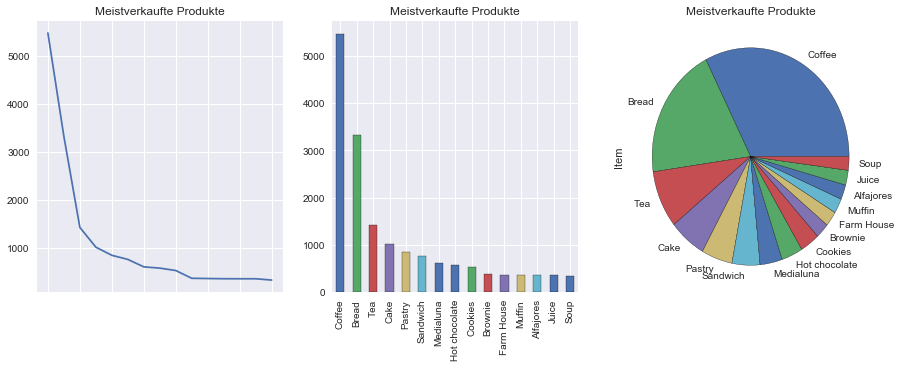

In [19]:
plt.figure(figsize=(15,5))

# Meistverkaufte Produkte als Linie
plt.subplot(1,3,1)
most_sold.plot(kind='line')
plt.title('Meistverkaufte Produkte')

# Meistverkaufte Produkte als Balkendiagramm
plt.subplot(1,3,2)
most_sold.plot(kind='bar')
plt.title('Meistverkaufte Produkte')

# Meistverkaufte Produkte als Kreisdiagramm
plt.subplot(1,3,3)
most_sold.plot(kind='pie')
plt.title('Meistverkaufte Produkte')

Das meistverkaufte Produkt ist Kaffe gefolgt von Brot, Tee, Kuchen und Gebäck. Das ist völlig normal und verständlich für eine Bäckerei. Nachdem wir wissen, welche Artikel am beliebtesten sind, schauen wir uns an, in welchen Monaten die meisten Verkäufe erzielt werden.

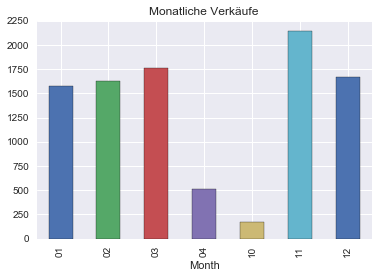

In [20]:
df.groupby('Month')['Transaction'].nunique().plot(kind='bar', title='Monatliche Verkäufe')
plt.show()

Sehr interessant. Im Oktober und April gibt es die drastischen Umsatzunterschiede. Sind das die Ausreißermonate im Datenbestand? Wir prüfen die Anzahl der Transaktionen für diese Monate im Vergleich zu den anderen.

In [21]:
print(df.groupby('Month')['Day'].nunique())

Month
01    30
02    28
03    31
04     9
10     2
11    30
12    29
Name: Day, dtype: int64


Tatsächlich. Wie bereits aus der Beschreibung des Datenbestandes bekannt war, wurden nur 9 Tagen für April und 2 Tage für Oktober erfasst.

***

<a id="Warenkorbanalyse"></a>
## Warenkorbanalyse

Die Information zur Bibliothek liegt unter: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

In [22]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

Wir erstellen erst die Liste der Transaktionen, damit wir sie später für den Apriori Algorithmus im TransactionEncoder formatieren können.

In [23]:
transaction_list = []

# FOR-Schleife zum Erstellen einer Liste der eindeutigen Transaktionen im Data-Set:
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

9465


In [24]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df_ary = pd.DataFrame(te_ary, columns=te.columns_)
df_ary

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
print('Data-Set Information nach der Pivot-Transformation: \n')
print(df_ary.info())

Data-Set Information nach der Pivot-Transformation: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 94 columns):
Adjustment                       9465 non-null bool
Afternoon with the baker         9465 non-null bool
Alfajores                        9465 non-null bool
Argentina Night                  9465 non-null bool
Art Tray                         9465 non-null bool
Bacon                            9465 non-null bool
Baguette                         9465 non-null bool
Bakewell                         9465 non-null bool
Bare Popcorn                     9465 non-null bool
Basket                           9465 non-null bool
Bowl Nic Pitt                    9465 non-null bool
Bread                            9465 non-null bool
Bread Pudding                    9465 non-null bool
Brioche and salami               9465 non-null bool
Brownie                          9465 non-null bool
Cake                             9465 non-null bool
Caramel

Nachdem das Daten-Set formatiert wurde, werden wir den Apriori-Algorithmus mit den assoziativen Regeln verwenden. Dabei wird für den Lift min_threshold = 1,0 festgelegt. Wenn er weniger als 1,0 ist, werden die beiden Produkte wahrscheinlich nicht zusammen gekauft (siehe Theorie oben). Die Ergebnisse werden nach der Konfidenz absteigend sortiert, um die Wahrscheinlichkeit zu sehen, dass ein Produkt gekauft wird, wenn sein "Vorgänger" gekauft wird.

In [29]:
frequent_itemsets = apriori(df_ary, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
27,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
37,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
0,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
10,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
38,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
16,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
25,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
23,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
9,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


<a id='Conclusions'></a>

<a id="Fazit"></a>
## Fazit

Allgemein gesehen (s. Meistverkaufte Produkte oben) ist der Kaffee das beliebteste Produkt. Das ist logisch und selbsterklärend, weil es eine Bäckerei ist.

Außerdem in der ersten Zeile in der Tabelle oben sehen wir, wenn ein Toast gekauft wird, wird zu 70% (s. Konfidenz) auch ein Kaffee gekauft. Oder der Kauf eines Toastes macht den Kauf eines Kaffees um 47% (s. Lift 147%) wahrscheinlicher. Anders gesagt, je höher der Lift, desto stärke die Korrelation zwischen den Produkten.

Aus diesem Grund sind alle Beziehungen zwischen Produkten interessant, wo der Lift hoch ist, auch wenn die Konfidenz niedrig ist z.B. (Format: Vorgänger (antecedents) -> Folger (consequents)):

- Cake -> Tea (Lift 160%)
- Tea -> Cake (Lift 160%)

- (Coffee + Tea) -> Cake (Lift 193% -> ca. 200% -> Wahrscheinlichkeit für das zusätzliche Produkt sich verdoppelt) 
- Cake -> (Coffee + Tea) (Lift 193% -> ca. 200% -> Wahrscheinlichkeit für das zusätzliche Produkt sich verdoppelt) 

- Sandwhich -> Tea (Lift 140%)
- Tea -> Sandwich (Lift 140%)

- Hot Chocolate -> Cake (Lift 188%)
- Cake -> Hot Chocolate (Lift 188%)


Die Spalten 'leverage' and 'conviction' beinhalten zusätzliche Metriken. Ihre Beschreibung finden Sie unter https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

Was kann eine Bäckerei mit dieser Analyse machen bzw. was für ein Nutzen in dieser Analyse für eine Bäckerei? Unternehmen sind immer bestrebt, ihre Einrichtung zu optimieren und ihren Umsatz zu steigern. Bäckereien sind nicht anders und Warenkorbanalyse kann für jede Art von Ladengeschäft oder Markt durchgeführt werden. Auf Grund der höhen Konfidenz kann man die Produkte näher plazieren und auf Grund des höhen Liftes kann man die Preisgestaltung besser nutzen. Dadurch können bestimmt die neuen Kunden gewinnen werden.

<a id="Excel Bonus"></a>
## Excel Bonus

Falls die Produktpalette überschaubar ist und die Anzahl der Transaktionen relativ klein ist, kann man diese Analyse in Excel machen. Wenn das Interesse besteht, kann ich ein kleines Beispiel machen. Sonst fragen Sie den Uncle Google. Die Stichworte sind: Warenkorbanalyse, Excel etc. Viel Spaß und Erfolg. Ich freue mich über ein Feedback unter (v (punkt) poliakov (at) gmx (dot) net :-)